In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt


In [4]:
chronic_kidney_disease_df = pd.read_csv('Chronic Kidney Disease.csv')

In [5]:
chronic_kidney_disease_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1'],
      dtype='object')

In [6]:
chronic_kidney_disease_df['DataValueUnit'].value_counts()

DataValueUnit
cases per 100,000      7326
%                      5902
cases per 1,000,000    1664
Name: count, dtype: int64

In [7]:
chronic_kidney_disease_df['Question'].value_counts()


Question
Mortality with end-stage renal disease                                 10989
Prevalence of chronic kidney disease among adults aged >= 18 years      5902
Incidence of treated end-stage renal disease                             832
Incidence of treated end-stage renal disease attributed to diabetes      832
Name: count, dtype: int64

In [8]:
chronic_kidney_disease_df['LocationAbbr'].value_counts()

LocationAbbr
CA    431
NY    426
WA    425
TX    424
AZ    421
OK    414
NC    414
MI    412
MN    407
CO    399
OR    395
KS    392
NM    392
FL    390
WI    387
NJ    383
CT    381
IL    380
MD    379
GA    376
MA    376
OH    375
HI    375
MO    375
PA    374
IN    374
VA    371
NV    371
TN    363
SC    361
UT    359
LA    358
NE    356
AL    334
IA    331
RI    326
AR    325
AK    325
KY    317
DE    312
MS    312
DC    308
SD    306
MT    306
ID    299
ND    295
WV    287
WY    278
ME    256
NH    256
VT    254
US    131
PR     90
GU     84
VI      7
Name: count, dtype: int64

In [9]:
#This code will show me if the YearStart column and the YearEnd column are all the same or not
same_years = (chronic_kidney_disease_df['YearStart'] == chronic_kidney_disease_df['YearEnd']).all()

if same_years:
    print("The 'YearStart' and 'YearEnd' columns have the same values in all rows.")
else:
    print("The 'YearStart' and 'YearEnd' columns do not have the same values in all rows.")

The 'YearStart' and 'YearEnd' columns have the same values in all rows.


In [10]:
#need to put the YearStart in order
chronic_kidney_disease_df=chronic_kidney_disease_df.sort_values(by='YearEnd')
chronic_kidney_disease_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
6015,2010,2010,WV,Chronic Kidney Disease,Mortality with end-stage renal disease,117.5,"cases per 100,000",Age-adjusted Rate,NaN,110.5,124.6,Gender,Male
1786,2010,2010,CA,Chronic Kidney Disease,Mortality with end-stage renal disease,2469.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
10579,2010,2010,NY,Chronic Kidney Disease,Mortality with end-stage renal disease,1615.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
6825,2010,2010,VT,Chronic Kidney Disease,Mortality with end-stage renal disease,73.3,"cases per 100,000",Crude Rate,NaN,63.8,82.9,Gender,Male
3917,2010,2010,IA,Chronic Kidney Disease,Mortality with end-stage renal disease,2325.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"White, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13854,2021,2021,GU,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,2.2,%,Age-adjusted Prevalence,NaN,1.4,3.4,Race/Ethnicity,"Other, non-Hispanic"
17323,2021,2021,RI,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,2.4,%,Age-adjusted Prevalence,NaN,1.9,3.1,Gender,Female
13845,2021,2021,GA,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,4.2,%,Crude Prevalence,NaN,3.7,4.8,Overall,Overall
13658,2021,2021,DE,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,2.8,%,Age-adjusted Prevalence,NaN,2.2,3.5,Race/Ethnicity,"White, non-Hispanic"


In [11]:
#This would turn 'YearEnd' into a date time by year but im sure why would need to do this will investigate more
#chronic_kidney_disease_df['YearEnd'] = pd.to_datetime(chronic_kidney_disease_df['YearEnd'], format='%Y')

#This code allows us to display value counts in order by year so we can see the order of years and how many rows of data each year contains
# use this code if you convert to datetime (year_end_counts = chronic_kidney_disease_df['YearEnd'].dt.year.value_counts().sort_index())
year_end_counts = chronic_kidney_disease_df['YearEnd'].value_counts().sort_index()
year_end_counts
#data summary for years: it looks like 2007 could be considered an outlier and possibly unusable for our analysis

YearEnd
2010     984
2011    1743
2012    1744
2013    1714
2014    1721
2015    1726
2016    1754
2017    1751
2018    1754
2019    1553
2020    1585
2021     526
Name: count, dtype: int64

In [12]:
# chekcing the dtype of the column 'YearEnd', thus far int64 is our goal, but might check again if datetime becomes our targeted dtype
chronic_kidney_disease_df['YearEnd'].dtype


dtype('int64')

In [13]:
#need to explore what kind of data we have in the DataValue comlumn to see what we can compare and use for a graph
#footnotes should give me an idea of what the numbers mean, check against documentation for further understanding
#need to understand if the questions datavalue is infering more or lesslikley hood of chronic desease
#Questions could be something that we could compare, need to check if the datavalues are comparable for all the same Questions
#what will groupby do if i groupby question: desired result it will group all same questions together to have comparable data amongst the same questions
#I might also need to groupby year: desired result all the same question whithin a particular year grouped together so I can show yearly changes with comparable data
#The LocationAbbr includes US, which has to be addressed
#we need to seperate or group by year,question, stratificationCategory1 and then stratification1 if not Overall


chronic_kidney_disease_df


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
6015,2010,2010,WV,Chronic Kidney Disease,Mortality with end-stage renal disease,117.5,"cases per 100,000",Age-adjusted Rate,NaN,110.5,124.6,Gender,Male
1786,2010,2010,CA,Chronic Kidney Disease,Mortality with end-stage renal disease,2469.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
10579,2010,2010,NY,Chronic Kidney Disease,Mortality with end-stage renal disease,1615.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
6825,2010,2010,VT,Chronic Kidney Disease,Mortality with end-stage renal disease,73.3,"cases per 100,000",Crude Rate,NaN,63.8,82.9,Gender,Male
3917,2010,2010,IA,Chronic Kidney Disease,Mortality with end-stage renal disease,2325.0,NaN,Number,NaN,NaN,NaN,Race/Ethnicity,"White, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13854,2021,2021,GU,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,2.2,%,Age-adjusted Prevalence,NaN,1.4,3.4,Race/Ethnicity,"Other, non-Hispanic"
17323,2021,2021,RI,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,2.4,%,Age-adjusted Prevalence,NaN,1.9,3.1,Gender,Female
13845,2021,2021,GA,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,4.2,%,Crude Prevalence,NaN,3.7,4.8,Overall,Overall
13658,2021,2021,DE,Chronic Kidney Disease,Prevalence of chronic kidney disease among adu...,2.8,%,Age-adjusted Prevalence,NaN,2.2,3.5,Race/Ethnicity,"White, non-Hispanic"


In [14]:
smokless_df =chronic_kidney_disease_df.loc[chronic_kidney_disease_df['Question'] == 'Current smokeless chronic_kidney_disease use among adults aged >= 18 years']
smokless_df

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1


In [15]:
#This groups the dataframe first by Year and then question, StratificationCat1, stratification, and finally groups by location
#It then applys a lambda function to make sure the years are in order.
#This currently does not address US in the locations with individual states
grouped_chronic_kidney_disease_df = chronic_kidney_disease_df.groupby(['YearEnd','Question','StratificationCategory1','Stratification1','LocationAbbr']).apply(
    lambda x: x.sort_values(by = 'YearEnd')).reset_index(drop = True)

grouped_chronic_kidney_disease_df.head()

,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2010,2010,AK,Chronic Kidney Disease,Mortality with end-stage renal disease,57.3,"cases per 100,000",Age-adjusted Rate,NaN,47.2,67.4,Gender,Female
1,2010,2010,AK,Chronic Kidney Disease,Mortality with end-stage renal disease,133.0,NaN,Number,NaN,NaN,NaN,Gender,Female
2,2010,2010,AK,Chronic Kidney Disease,Mortality with end-stage renal disease,39.0,"cases per 100,000",Crude Rate,NaN,32.4,45.7,Gender,Female
3,2010,2010,AL,Chronic Kidney Disease,Mortality with end-stage renal disease,70.6,"cases per 100,000",Age-adjusted Rate,NaN,67.6,73.7,Gender,Female
4,2010,2010,AL,Chronic Kidney Disease,Mortality with end-stage renal disease,86.9,"cases per 100,000",Crude Rate,NaN,83.2,90.6,Gender,Female


In [16]:
#use this to look at a list of possible questions to choose from
grouped_chronic_kidney_disease_df['Question'].value_counts()

Question
Mortality with end-stage renal disease                                 10989
Prevalence of chronic kidney disease among adults aged >= 18 years      5902
Incidence of treated end-stage renal disease                             832
Incidence of treated end-stage renal disease attributed to diabetes      832
Name: count, dtype: int64

In [17]:
#The question is can we turn this into a function to apply to other csvs???

#creates a list with all the target valus in the Questions column
questions = grouped_chronic_kidney_disease_df['Question'].unique().tolist()
#creating an empty dictionary to store dataframes with their own unique questions
dfs = {}
#looping through our grouped dataframe to create multiple dataframes containing only one question along with its values and then storing them in a dictionary
# also sets their key values to the target question in their respective dataframes
for question in questions:
    df_name = question
    dfs[df_name] = grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'] == question]\
        .loc[grouped_chronic_kidney_disease_df['LocationAbbr'] == 'US']\
        .loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']





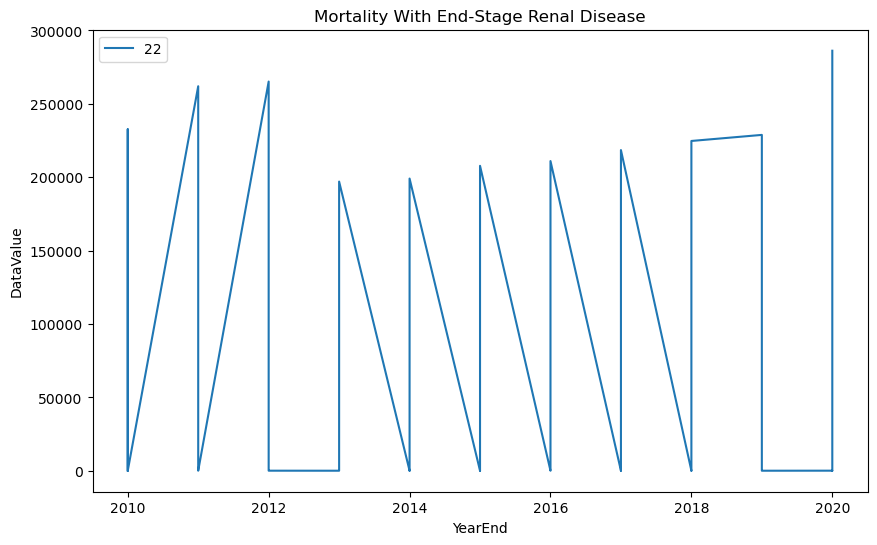

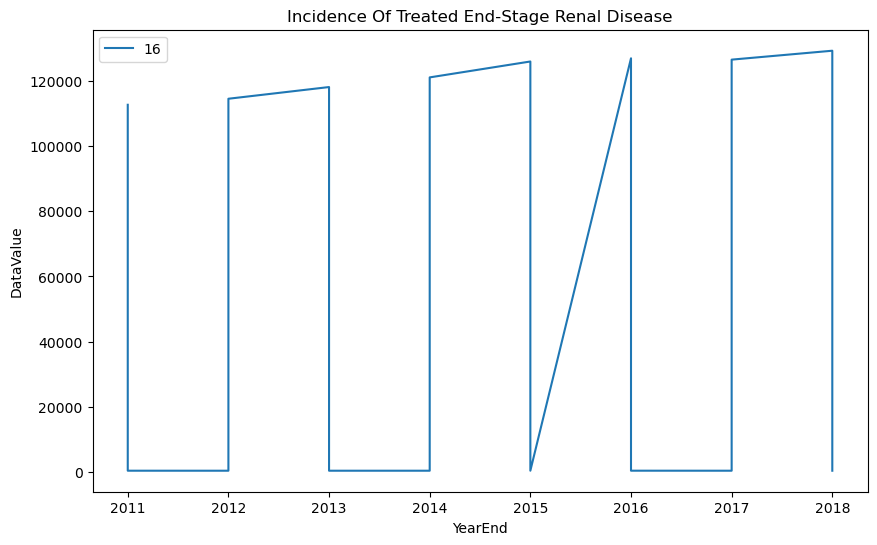

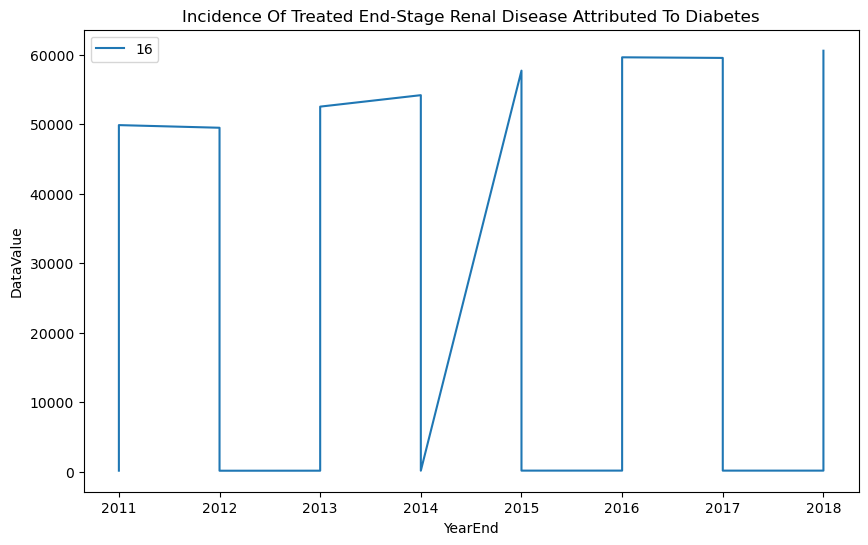

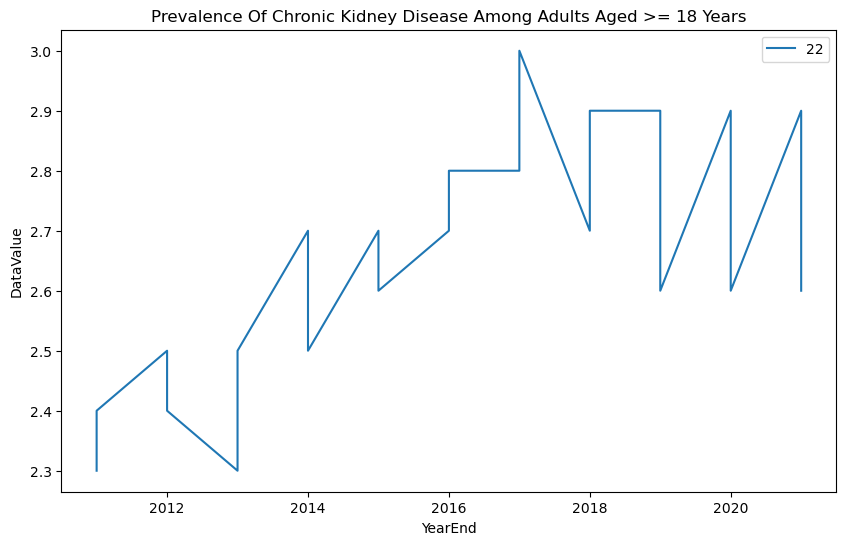

In [19]:
#loops through the dfs dictionary to extract the individual dfs by their 'Question' name and then plot them by yearend and datavalue
for df_name, df in dfs.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['YearEnd'], df['DataValue'], label=df['DataValueUnit'].count())
    plt.xlabel('YearEnd')
    plt.ylabel('DataValue')
    title = df_name.replace('_', ' ').title()
    plt.title(title)
    plt.legend()
    # plt.savefig(f'{title}.png')
    plt.show()

Results: 'Percent chronic_kidney_disease revenue to fund at CDC recommended level' & 'Sale of cigarette packs' & 'Secondary schools that have a comprehensive chronic_kidney_disease-free school policy in place' dataframes don't have US or possibly Overall data causing them to be empty

dataframes with similar datavalue units that we could possibly plot on one graph:
    us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
    us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
#The top two have ranges 14 to 22 and the bottom has 15 to 21 could possibly combine these
    us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']

#range 4 to 9
    us_overall_smokeless_youth_df=dfs['Current smokeless chronic_kidney_disease use among youth']
#range 6 to 16
    us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']

#range 52 to 66
    us_overall_quit_chronic_kidney_disease_df = dfs['Quit attempts in the past year among current smokers']
#range 60 to 68
    us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
#range 50 to 62
    us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']




In [ ]:
#renaming all the dataframes in the dfs{} and storing them in their respective dataframes
us_overall_18_older_smokers_df = dfs['Current smoking among adults aged >= 18 years']
us_overall_quit_chronic_kidney_disease_df = dfs['Quit attempts in the past year among current smokers']
us_overall_pneumococcal_vaccination_adult_age18_64_smokers_df =dfs['Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke']
us_overall_smokeless_chronic_kidney_disease_adult_df = dfs['Current smokeless chronic_kidney_disease use among adults aged >= 18 years']
us_overall_pneumococcal_vaccination_adult_age65_older_smokers_df=dfs['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke']
us_overall_ciggarette_women_age18_44_df=dfs['Current cigarette smoking among women aged 18-44 years']
us_overall_smokingb4pregnancy_df = dfs['Cigarette smoking before pregnancy']
us_overall_cigarette_youth_df=dfs['Current cigarette smoking among youth']
us_overall_smokeless_youth_df=dfs['Current smokeless chronic_kidney_disease use among youth']
us_overall_smoke_free_indoor_policy=dfs['Proportion of the population protected by a comprehensive smoke-free policy prohibiting smoking in all indoor areas of workplaces and public places, including restaurants and bars']
us_overall_sale_cigarette_packs=dfs['Sale of cigarette packs']
us_overall_2nd_school_chronic_kidney_disease_free_policy=dfs['Secondary schools that have a comprehensive chronic_kidney_disease-free school policy in place']
us_overall_chronic_kidney_disease_revenue_fund_cdc_level = dfs['Percent chronic_kidney_disease revenue to fund at CDC recommended level']

<Axes: xlabel='YearEnd'>

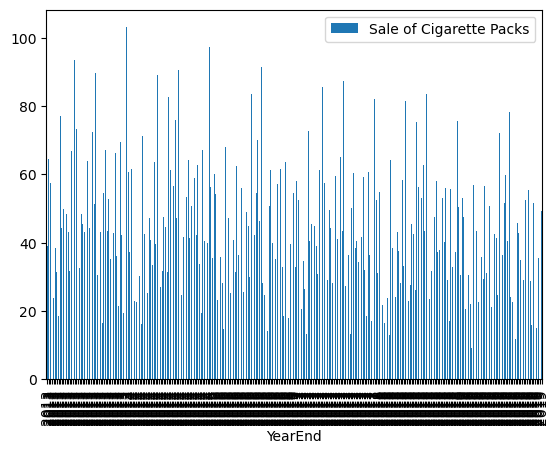

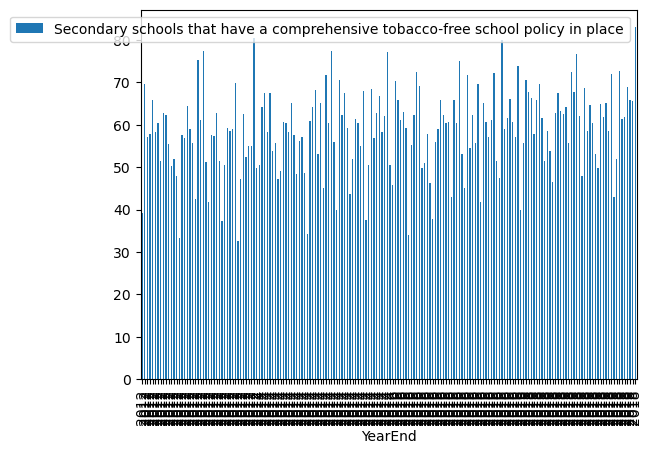

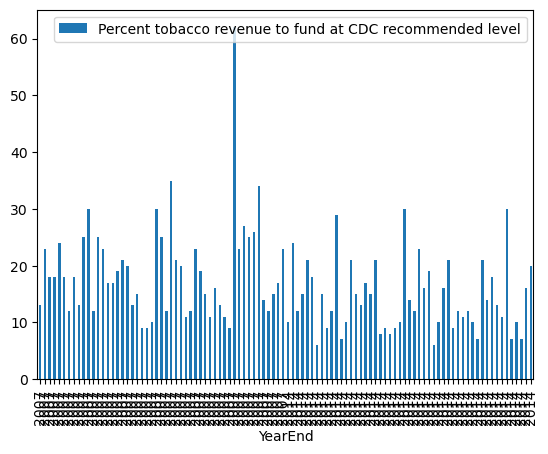

In [ ]:
#filter these by location and possibly Overall and maybe we could make a bar graph?
overall_sale_cigarette_packs_df=grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'] == 'Sale of cigarette packs']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']

overall_2nd_school_chronic_kidney_disease_free_policy_df = grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'] == 'Secondary schools that have a comprehensive chronic_kidney_disease-free school policy in place']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']

overall_chronic_kidney_disease_revenue_fund_cdc_level_df =grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'] == 'Percent chronic_kidney_disease revenue to fund at CDC recommended level']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall'] 

#overall_sale_cigarette_packs_df
#overall_2nd_school_chronic_kidney_disease_free_policy_df
#overall_chronic_kidney_disease_revenue_fund_cdc_level_df

overall_sale_cigarette_packs_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Sale of Cigarette Packs')
overall_2nd_school_chronic_kidney_disease_free_policy_df.plot(kind ='bar',x = 'YearEnd', y = "DataValue", label = 'Secondary schools that have a comprehensive chronic_kidney_disease-free school policy in place')
overall_chronic_kidney_disease_revenue_fund_cdc_level_df.plot(kind ='bar', x = 'YearEnd', y = "DataValue", label = 'Percent chronic_kidney_disease revenue to fund at CDC recommended level')
#plt.legend()
#plt.figure(figsize=(20,10))

In [ ]:
#lets choose a question with an easy to understand and compareble data value with the location being the US and the stratification being overall
# ill start by looking at questions and datavaluess
us_overall_smokingb4pregnancy_df =grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'] == 'Cigarette smoking before pregnancy'].loc[grouped_chronic_kidney_disease_df['LocationAbbr'] == 'US']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']

us_overall_quit_chronic_kidney_disease_df =grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'] == 'Quit attempts in the past year among current smokers'].loc[grouped_chronic_kidney_disease_df['LocationAbbr'] == 'US']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']
#us_overall_smokingb4pregnancy_df
#us_overall_quit_chronic_kidney_disease_df.info()
#us_overall_quit_chronic_kidney_disease_df[['DataValue', 'DataValueUnit', 'DataValueType']]

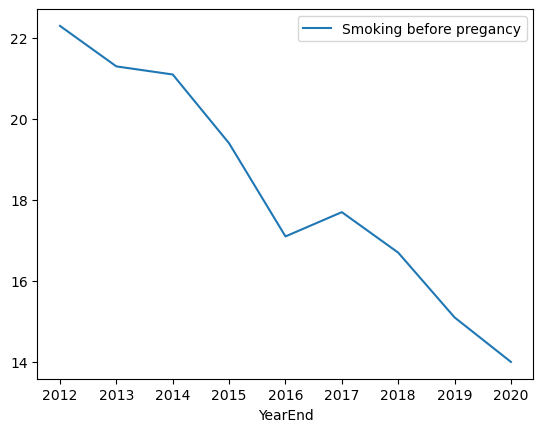

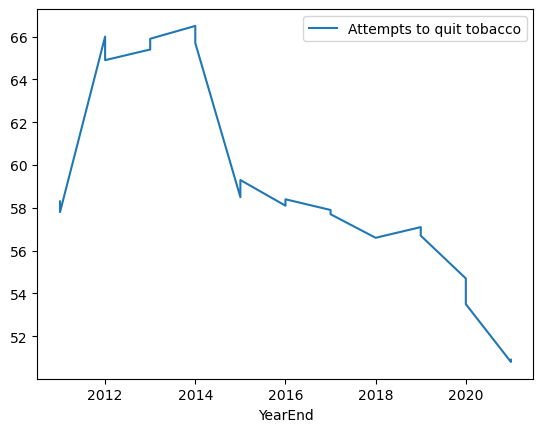

In [ ]:
us_overall_smokingb4pregnancy_df.plot(x = 'YearEnd', y = "DataValue", label = 'Smoking before pregancy')
us_overall_quit_chronic_kidney_disease_df.plot(x = 'YearEnd', y = "DataValue", label = 'Attempts to quit chronic_kidney_disease')
plt.legend()

# plt.plot(us_overall_quit_chronic_kidney_disease_df['YearEnd'], us_overall_quit_chronic_kidney_disease_df['DataValue'], label = "Attempts to quit chronic_kidney_disease")
# plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
# plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('chronic_kidney_disease')
# plt.legend()

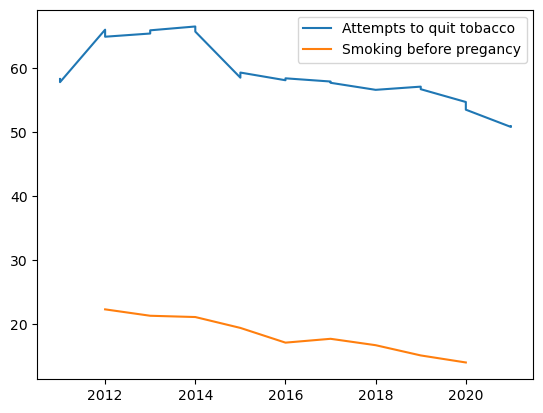

In [ ]:
plt.plot(us_overall_quit_chronic_kidney_disease_df['YearEnd'], us_overall_quit_chronic_kidney_disease_df['DataValue'], label = "Attempts to quit chronic_kidney_disease")
plt.plot(us_overall_smokingb4pregnancy_df["YearEnd"], us_overall_smokingb4pregnancy_df['DataValue'], label = 'Smoking before pregancy')
plt.legend()


# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
# plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
# plt.xlabel('Year')
# plt.ylabel('Question')
# plt.title('chronic_kidney_disease')
# plt.legend()

In [ ]:
chronic_kidney_disease_df['Question'].value_counts()

Question
Current smoking among adults aged >= 18 years                                                                                                                                          8645
Quit attempts in the past year among current smokers                                                                                                                                   6293
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke                                                                                                  5852
Current smokeless chronic_kidney_disease use among adults aged >= 18 years                                                                                                                            5384
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke                                                                                                  4497
Current cigarette smoking among wome

In [ ]:
#we first filtered the dataframe to only include 2 questions as well as location = US, stratification = Overall

question_year_df =grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless chronic_kidney_disease use among adults aged >= 18 years'])].loc[grouped_chronic_kidney_disease_df['LocationAbbr'] == 'US']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']

#put each question into its own list
# Create new columns based on the values in the 'Initial_Column'
question_year_df['Question1'] = np.where(question_year_df['Question'] =='Current smoking among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df['Question2'] = np.where(question_year_df['Question'] =='Current smokeless chronic_kidney_disease use among adults aged >= 18 years',
                                         question_year_df['DataValue'],
                                         np.nan)
question_year_df.head()


,YearStart,YearEnd,LocationAbbr,Topic,Question,DataValue,DataValueUnit,DataValueType,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Question1,Question2
594,2011,2011,US,chronic_kidney_disease,Current smokeless chronic_kidney_disease use among adults age...,4.4,%,Crude Prevalence,50 States + DC: US Median,3.6,4.8,Overall,Overall,NaN,4.4
595,2011,2011,US,chronic_kidney_disease,Current smokeless chronic_kidney_disease use among adults age...,4.5,%,Age-adjusted Prevalence,50 States + DC: US Median,3.7,5.0,Overall,Overall,NaN,4.5
1115,2011,2011,US,chronic_kidney_disease,Current smoking among adults aged >= 18 years,21.2,%,Crude Prevalence,50 States + DC: US Median,20.0,22.4,Overall,Overall,21.2,NaN
1116,2011,2011,US,chronic_kidney_disease,Current smoking among adults aged >= 18 years,21.3,%,Age-adjusted Prevalence,50 States + DC: US Median,20.3,22.5,Overall,Overall,21.3,NaN
3808,2012,2012,US,chronic_kidney_disease,Current smokeless chronic_kidney_disease use among adults age...,4.1,%,Age-adjusted Prevalence,50 States + DC: US Median,3.9,4.7,Overall,Overall,NaN,4.1


In [ ]:
question_year_df.columns


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'Topic', 'Question',
       'DataValue', 'DataValueUnit', 'DataValueType', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Question1', 'Question2'],
      dtype='object')

In [ ]:
question_year_filter = question_year_df[['YearEnd','Question1','Question2']]
#question_year_filter.set_index("YearEnd")
question_year_filter.head()

,YearEnd,Question1,Question2
594,2011,NaN,4.4
595,2011,NaN,4.5
1115,2011,21.2,NaN
1116,2011,21.3,NaN
3808,2012,NaN,4.1


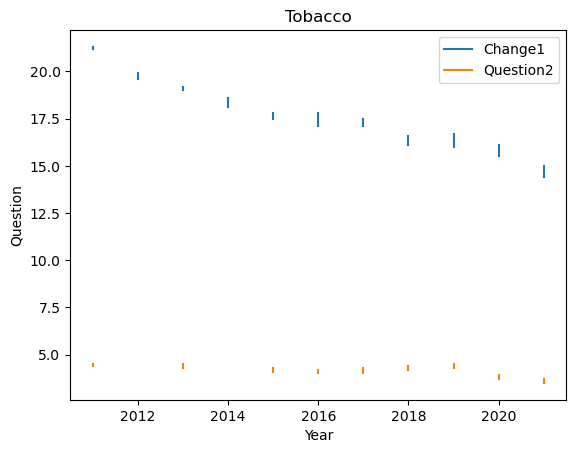

In [ ]:
#ploting 2 question on the same graph with YearEnd as the x axis
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question1'], label = 'Change1')
plt.plot( question_year_filter["YearEnd"] , question_year_filter['Question2'], label = 'Question2')
plt.xlabel('Year')
plt.ylabel('Question')
plt.title('chronic_kidney_disease')
plt.legend()

C:\Users\tyzwh\AppData\Local\Temp\ipykernel_32328\2962594156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)


<Axes: >

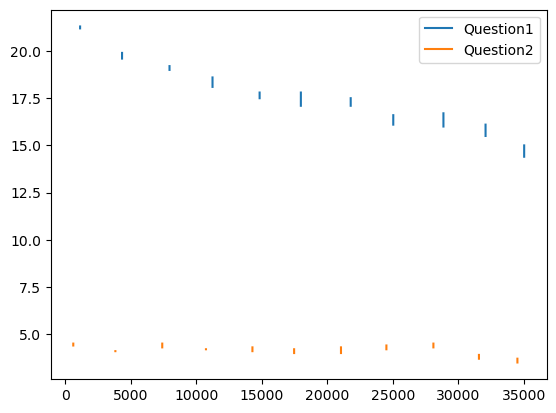

In [ ]:
#df['column_name'] = df['column_name'].astype(int)
question_year_filter['YearEnd'] = question_year_filter['YearEnd'].astype(int)

question_year_filter[['Question1', 'Question2']].plot()



#question_year_filter.plot(y = 'Question1', 'Question2')


In [ ]:
us_overall_df =grouped_chronic_kidney_disease_df.loc[grouped_chronic_kidney_disease_df['Question'].isin(['Current smoking among adults aged >= 18 years', 'Current smokeless chronic_kidney_disease use among adults aged >= 18 years'])].loc[grouped_chronic_kidney_disease_df['LocationAbbr'] == 'US']\
.loc[grouped_chronic_kidney_disease_df['StratificationCategory1'] == 'Overall']

us_overall_df.tail()


<Axes: title={'center': 'Question'}, xlabel='YearEnd', ylabel='DataValue'>

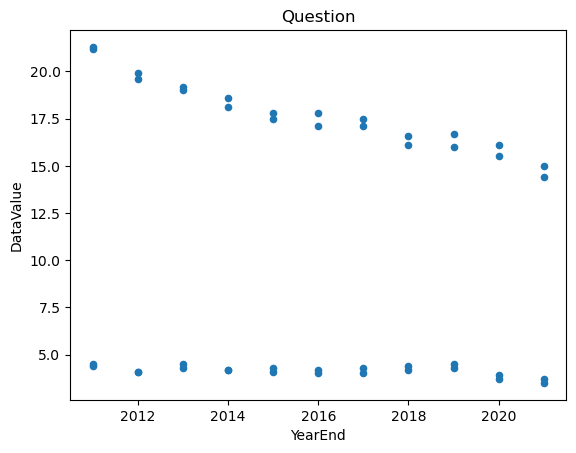

In [ ]:
us_overall_df.plot(kind = 'scatter', x='YearEnd', y= 'DataValue', title ='Question' )